In [61]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [62]:
img = cv2.imread('./testimages/image_17.jpeg')
img.shape

(218, 231, 3)

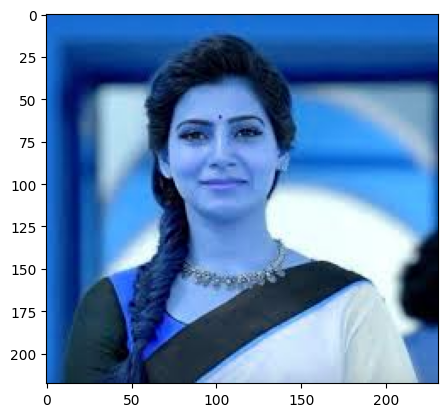

In [63]:
plt.imshow(img)

In [64]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(218, 231)

In [65]:
gray

array([[127, 127, 127, ..., 126, 126, 126],
       [127, 127, 127, ..., 126, 126, 126],
       [127, 127, 127, ..., 127, 127, 127],
       ...,
       [130, 129, 127, ..., 131, 132, 132],
       [130, 128, 123, ..., 128, 128, 128],
       [130, 128, 123, ..., 128, 128, 128]], dtype=uint8)

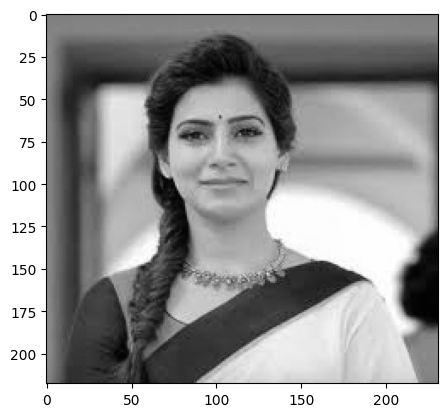

In [66]:
plt.imshow(gray, cmap='gray')

In [67]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[62, 40, 80, 80]])

In [68]:
(x,y,w,h) = faces[0]
x,y,w,h

(62, 40, 80, 80)

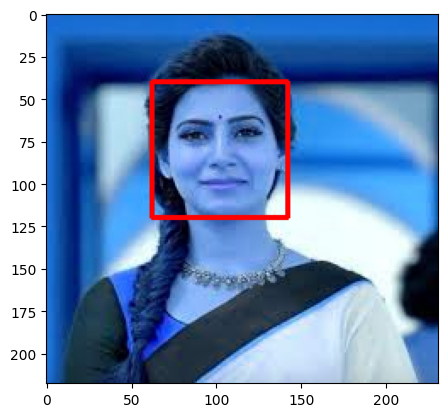

In [69]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

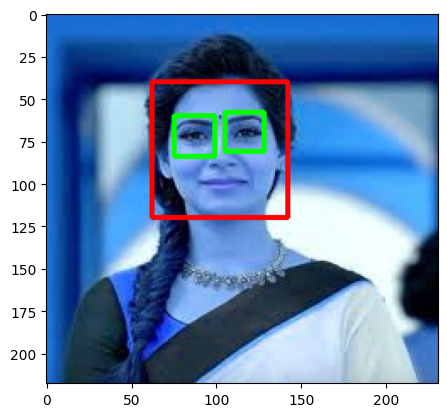

In [70]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

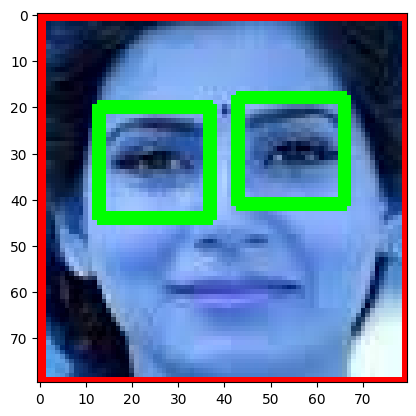

In [71]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [72]:
cropped_img = np.array(roi_color)
cropped_img.shape

(80, 80, 3)

In [73]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

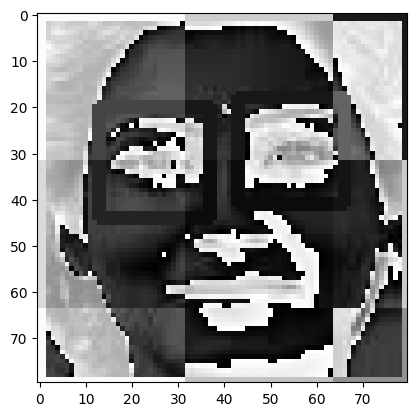

In [74]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [75]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

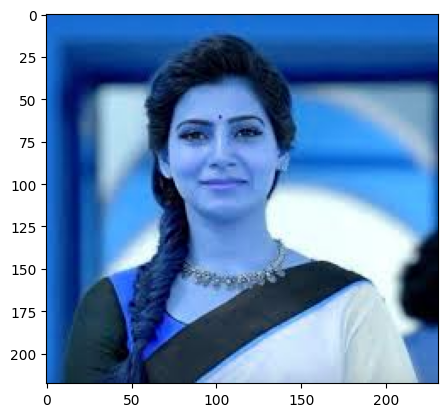

In [76]:
original_image = cv2.imread('./testimages/image_17.jpeg')
plt.imshow(original_image)

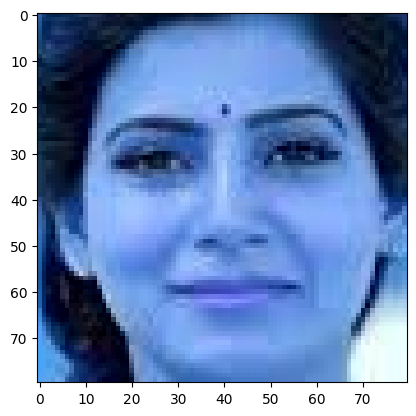

In [77]:
cropped_image = get_cropped_image_if_2_eyes('./testimages/image_17.jpeg')
plt.imshow(cropped_image)

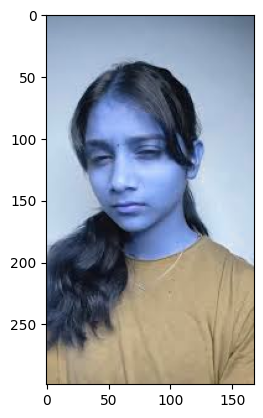

In [78]:
org_image_obstructed = cv2.imread('./testimages/image_31.jpeg')
plt.imshow(org_image_obstructed)

In [79]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./testimages/image_30.jpeg')
cropped_image_no_2_eyes

array([[[ 78, 109, 148],
        [ 58,  84, 121],
        [ 52,  70, 107],
        ...,
        [209, 207, 219],
        [221, 217, 229],
        [219, 213, 224]],

       [[ 78, 104, 144],
        [ 61,  82, 120],
        [ 54,  69, 108],
        ...,
        [191, 191, 207],
        [203, 202, 218],
        [204, 202, 214]],

       [[ 72,  98, 138],
        [ 59,  80, 118],
        [ 54,  69, 108],
        ...,
        [185, 188, 203],
        [201, 201, 217],
        [204, 204, 218]],

       ...,

       [[  3,   8,  29],
        [  0,   0,  22],
        [  0,   0,  17],
        ...,
        [ 53,  57, 108],
        [ 51,  55, 106],
        [ 60,  67, 117]],

       [[  0,   0,  20],
        [  0,   0,  21],
        [ 25,  36,  64],
        ...,
        [ 57,  61, 114],
        [ 56,  60, 113],
        [ 64,  71, 121]],

       [[  0,   9,  39],
        [ 78,  91, 123],
        [143, 158, 191],
        ...,
        [ 60,  66, 119],
        [ 61,  67, 120],
        [ 66,  74, 127]]

In [80]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [81]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [82]:
img_dirs

['./dataset/allu arjun pics',
 './dataset/cropped',
 './dataset/samantha pics',
 './dataset/sindhuri pics',
 './dataset/vijay thalapathy pics',
 './dataset/virat kohli pics']

In [83]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [84]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/allu arjun pics


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [57]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

NameError: name 'class_dict' is not defined

In [59]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

ValueError: Found input variables with inconsistent numbers of samples: [1, 0]